# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [1]:
# Path Import
path = r'/Users/carolinelasersohn/Documents/Documents - Caroline’s MacBook Pro/data analytics/Immersion/4. Python/Instacart Basket Analysis 2023'

In [3]:
# final data import
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_FINAL.pkl'))

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,date_joined,dependant_count,fam_status,income,region,activity_flag,age_group,income_group,department,department_flag,dependants_flag,family_flag,family_flag_detailed,family_flag_income,family_flag_age
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Active customer,18-33,Low,beverages,None,Has dependants,"Married woman, has children","Married woman, has children, low income","Low income, married woman, has children","Young, married woman, has children"
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Active customer,18-33,Low,beverages,None,Has dependants,"Married woman, has children","Married woman, has children, low income","Low income, married woman, has children","Young, married woman, has children"
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Active customer,18-33,Low,beverages,None,Has dependants,"Married woman, has children","Married woman, has children, low income","Low income, married woman, has children","Young, married woman, has children"
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Active customer,18-33,Low,beverages,None,Has dependants,"Married woman, has children","Married woman, has children, low income","Low income, married woman, has children","Young, married woman, has children"
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Active customer,18-33,Low,beverages,None,Has dependants,"Married woman, has children","Married woman, has children, low income","Low income, married woman, has children","Young, married woman, has children"


In [6]:
df.shape

(30964564, 41)

# Visualizations

## Distribution of Family Profiles (basic)

#### family_flag

Text(0, 0.5, 'Count')

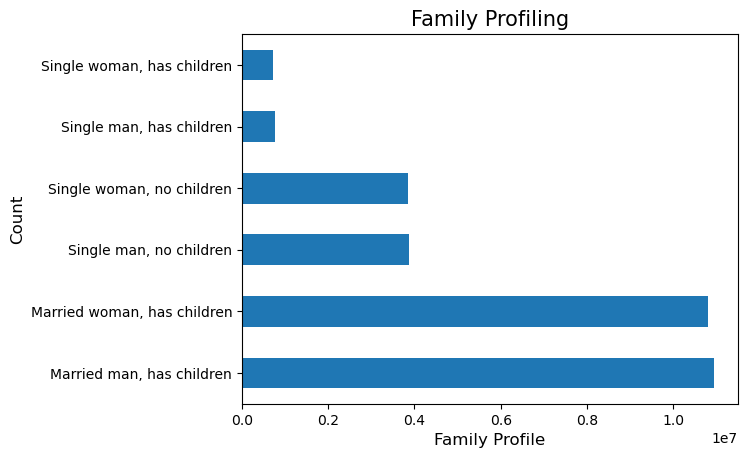

In [17]:
family_flag_bar_1 = df['family_flag'].value_counts().plot.barh()
plt.title("Family Profiling", fontsize=15)
plt.xlabel("Family Profile", fontsize=12)
plt.ylabel("Count", fontsize=12)  

Insights
- Married people with children are ordering the most

In [19]:
# Export visualization family_flag_bar_1
family_flag_bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_flag_bar_1.png'))

#### Aggregating Basic Stats for Family_Flag

In [9]:
# create subset with relevant columns max_order and price
family_flag_stats = df[['family_flag', 'order_id', 'max_order', 'prices']]

In [10]:
# data
family_flag_stats.groupby('family_flag').agg({'max_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

max_order                prices             \
                                  min       mean max    min       mean   
family_flag                                                              
Married man, has children           5  34.198432  99    1.0  12.013314   
Married woman, has children         5  34.418168  99    1.0  11.874497   
Single man, has children            5  34.745814  99    1.0   9.625240   
Single man, no children             5  34.389313  99    1.0  12.537981   
Single woman, has children          5  34.965369  99    1.0  12.214567   
Single woman, no children           5  34.964081  99    1.0  11.664725   

                                      
                                 max  
family_flag                           
Married man, has children    99999.0  
Married woman, has children  99999.0  
Single man, has children     99999.0  
Single man, no children      99999.0  
Single woman, has children   99999.0  
Single woman, no children    99999.0

Insights
- Single woman with and without children have slightly higher than average max orders
- Single men with no children have slightly higher than average prices

## Distribution of Family Profiles - Income

#### family_flag_income

Text(0, 0.5, 'Count')

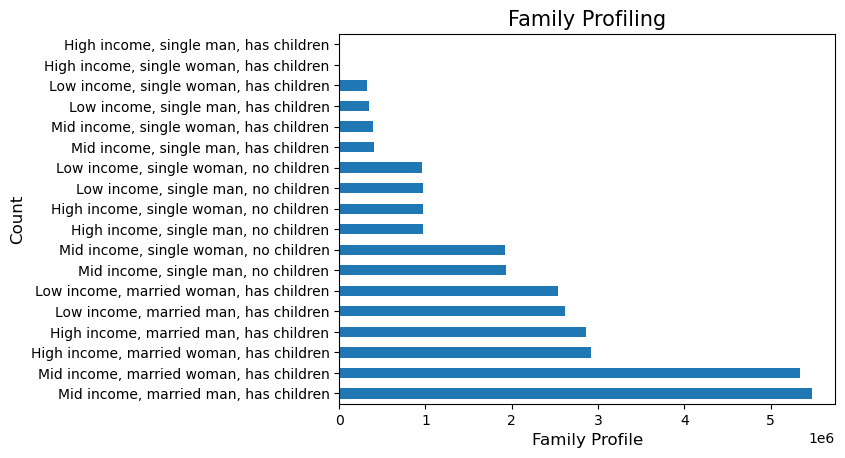

In [18]:
family_income_bar_1 = df['family_flag_income'].value_counts().plot.barh()
plt.title("Family Profiling", fontsize=15)
plt.xlabel("Family Profile", fontsize=12)
plt.ylabel("Count", fontsize=12) 

Insights
- Being married seems to be the most contributing factor to purchasing
- The second most important factor is having children
- Mid-income family ranks the highest, which makes sense given the demographic distribution of the US

In [22]:
# Export visualization family_income_bar_1
family_income_bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_income_bar_1.png'))

#### Aggregating Basic Stats for Family_Flag_Income

In [13]:
# create subset with relevant columns max_order and price
family_flag_stats_income = df[['family_flag_income', 'order_id', 'max_order', 'prices']]

In [15]:
# data
family_flag_stats_income.groupby('family_flag_income').agg({'max_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

max_order                prices  \
                                               min       mean max    min   
family_flag_income                                                         
High income, married man, has children           5  33.655205  99    1.0   
High income, married woman, has children         5  35.026285  99    1.0   
High income, single man, has children            5  36.443439  64    1.0   
High income, single man, no children             5  34.359819  99    1.0   
High income, single woman, has children          5  53.615410  99    1.0   
High income, single woman, no children           5  36.230921  99    1.0   
Low income, married man, has children            5  33.796361  99    1.0   
Low income, married woman, has children          5  33.564999  99    1.0   
Low income, single man, has children             5  32.981041  99    1.0   
Low income, single man, no children              5  33.627392  99    1.0   
Low income, single woman, has children           5  33.956033  99    1.0   
Low income, single woman, no children            5  34.007853  99    1.0   
Mid income, married man, has children            5  34.674190  99    1.0   
Mid income, married woman, has children          5  34.490547  99    1.0   
Mid income, single man, has children             5  36.179858  99    1.0   
Mid income, single man, no children              5  34.785854  99    1.0   
Mid income, single woman, has children           5  35.374436  99    1.0   
Mid income, single woman, no children            5  34.801829  99    1.0   

                                                               
                                                mean      max  
family_flag_income                                             
High income, married man, has children     21.154707  99999.0  
High income, married woman, has children   21.433129  99999.0  
High income, single man, has children     103.407557  99999.0  
High income, single man, no children       24.913821  99999.0  
High income, single woman, has children   291.626202  99999.0  
High income, single woman, no children     19.897792  99999.0  
Low income, married man, has children       7.260938     25.0  
Low income, married woman, has children     7.285400  14900.0  
Low income, single man, has children        7.597406     25.0  
Low income, single man, no children         7.298995     25.0  
Low income, single woman, has children      7.598329     25.0  
Low income, single woman, no children       7.321145  14900.0  
Mid income, married man, has children       9.505407  99999.0  
Mid income, married woman, has children     8.829712  99999.0  
Mid income, single man, has children        9.285280  99999.0  
Mid income, single man, no children         8.947552  99999.0  
Mid income, single woman, has children      9.645658  99999.0  
Mid income, single woman, no children       9.678434  99999.0

Insights
- High income, single woman, has children; has the largest max order by far at 53.6 average. Every other group is between 33-37
- High income single women and men with children both spend much more than the other groups at 291 and 103. All other groups are between 7-25 

## Distribution of Family Profiles - Age

#### family_flag_age

Text(0, 0.5, 'Count')

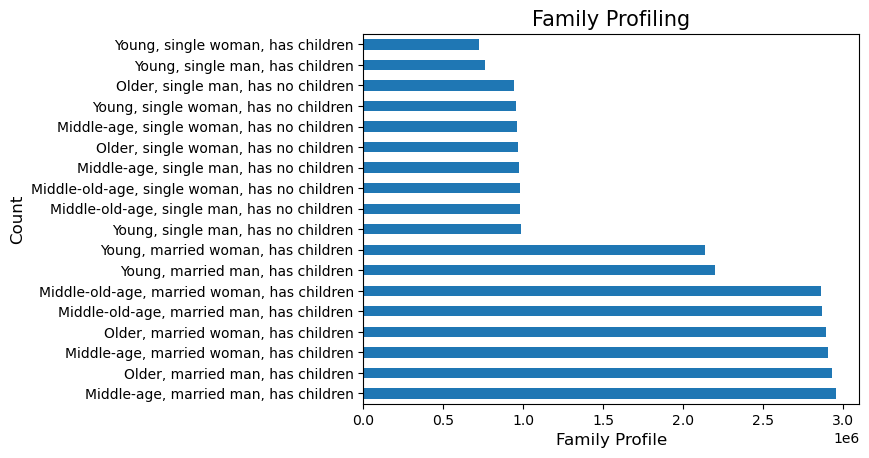

In [20]:
family_age_bar_1 = df['family_flag_age'].value_counts().plot.barh()
plt.title("Family Profiling", fontsize=15)
plt.xlabel("Family Profile", fontsize=12)
plt.ylabel("Count", fontsize=12)

Insights
- Having children is the most important factor in terms of being a customer
- Secondly, being middle age or older is the most represented age group, with the middle group middle-old-age being slightly behind
- young, single, men and women, with kids, is our lowest demographic
- after that, it's everyone without children

In [23]:
# Export visualization family_age_bar_1
family_age_bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_age_bar_1.png'))

#### Aggregating Basic Stats for Family_Flag_Age

In [24]:
# create subset with relevant columns max_order and price
family_flag_stats_age = df[['family_flag_age', 'order_id', 'max_order', 'prices']]

In [25]:
# data
family_flag_stats_age.groupby('family_flag_age').agg({'max_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

max_order                prices  \
                                                    min       mean max    min   
family_flag_age                                                                 
Middle-age, married man, has children                 5  34.753782  99    1.0   
Middle-age, married woman, has children               5  34.827608  99    1.0   
Middle-age, single man, has no children               5  34.710283  99    1.0   
Middle-age, single woman, has no children             5  34.007134  99    1.0   
Middle-old-age, married man, has children             5  33.582015  99    1.0   
Middle-old-age, married woman, has children           5  34.358869  99    1.0   
Middle-old-age, single man, has no children           5  35.624675  99    1.0   
Middle-old-age, single woman, has no children         5  35.683134  99    1.0   
Older, married man, has children                      5  34.207017  99    1.0   
Older, married woman, has children                    5  34.424728  99    1.0   
Older, single man, has no children                    5  33.116943  99    1.0   
Older, single woman, has no children                  5  35.754420  99    1.0   
Young, married man, has children                      5  34.244374  99    1.0   
Young, married woman, has children                    5  33.932469  99    1.0   
Young, single man, has children                       5  34.745814  99    1.0   
Young, single man, has no children                    5  34.059118  99    1.0   
Young, single woman, has children                     5  34.965369  99    1.0   
Young, single woman, has no children                  5  34.392906  99    1.0   

                                                                   
                                                    mean      max  
family_flag_age                                                    
Middle-age, married man, has children          11.365786  99999.0  
Middle-age, married woman, has children        12.463595  99999.0  
Middle-age, single man, has no children        13.273702  99999.0  
Middle-age, single woman, has no children      12.972566  99999.0  
Middle-old-age, married man, has children      12.523107  99999.0  
Middle-old-age, married woman, has children    11.288433  99999.0  
Middle-old-age, single man, has no children    11.769604  99999.0  
Middle-old-age, single woman, has no children  10.074114  99999.0  
Older, married man, has children               12.192343  99999.0  
Older, married woman, has children             11.304812  99999.0  
Older, single man, has no children             12.321716  99999.0  
Older, single woman, has no children           11.808883  99999.0  
Young, married man, has children               11.979906  99999.0  
Young, married woman, has children             12.629781  99999.0  
Young, single man, has children                 9.625240  99999.0  
Young, single man, has no children             12.783665  99999.0  
Young, single woman, has children              12.214567  99999.0  
Young, single woman, has no children           11.831091  99999.0

Insights
- There aren't many large data discrencies with age in terms of order amount or price
- Young, single men, with children spend the least
- Middle age, single men, with no children, spend the most

## Customer Profiles -  Regions

#### family_flag

In [26]:
# family profiles by region
fam_region = pd.crosstab(df['family_flag'],df['region'], dropna = False)

In [27]:
fam_region

region,Midwest,Northeast,South,West
family_flag,,,,
"Married man, has children",2527235,1996450,3655100,2768961
"Married woman, has children",2560027,1857323,3568649,2809966
"Single man, has children",179522,137743,251334,188997
"Single man, no children",917274,690826,1267677,1005621
"Single woman, has children",171913,118687,254123,178853
"Single woman, no children",905542,663656,1314256,974829


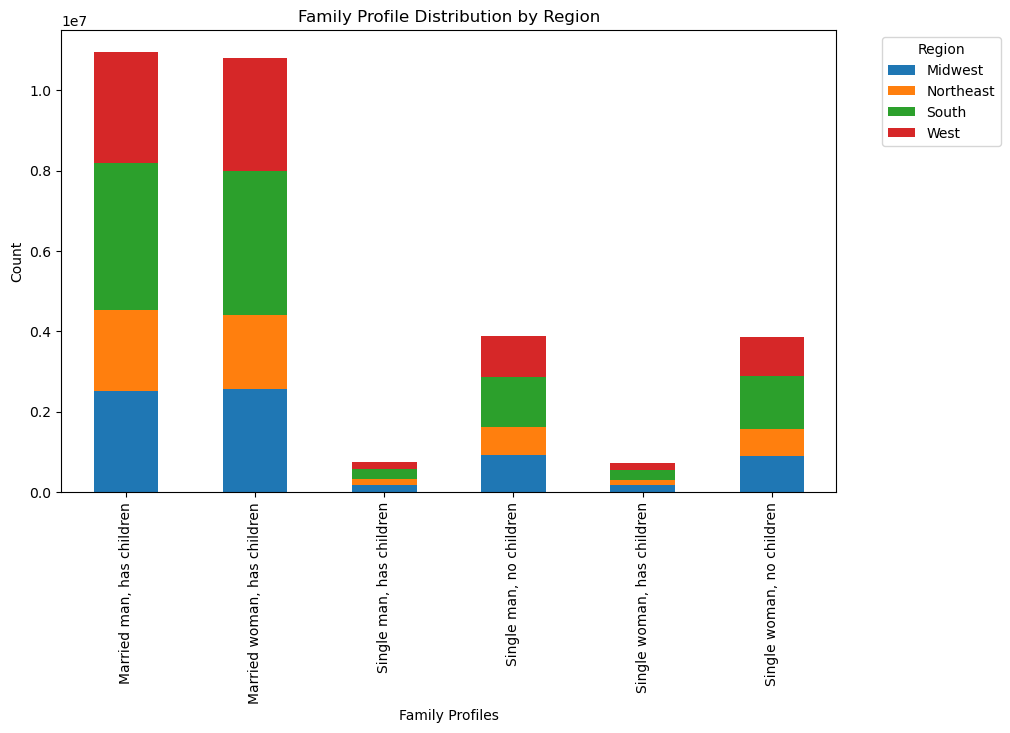

In [28]:
fam_region_bar_1 = fam_region.plot.bar(stacked=True, figsize=(10, 6))

plt.title('Family Profile Distribution by Region')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

Insights
- The south tends to dominate in all family groups

In [35]:
# Export visualization family_region_bar_1
fam_region_bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_region_bar_1.png'))

#### family_flag_income

In [29]:
# family income profiles by region
fam_region_income = pd.crosstab(df['family_flag_income'],df['region'], dropna = False)

In [30]:
fam_region_income

region,Midwest,Northeast,South,West
family_flag_income,,,,
"High income, married man, has children",681479,538008,930137,710713
"High income, married woman, has children",697642,497433,960823,762683
"High income, single man, has children",2124,1073,3429,2214
"High income, single man, no children",234711,169508,312682,256164
"High income, single woman, has children",1288,528,5066,2060
"High income, single woman, no children",224594,166288,337130,243314
"Low income, married man, has children",601187,461300,880001,670597
"Low income, married woman, has children",603183,446385,834428,649628
"Low income, single man, has children",82236,64570,111795,81761


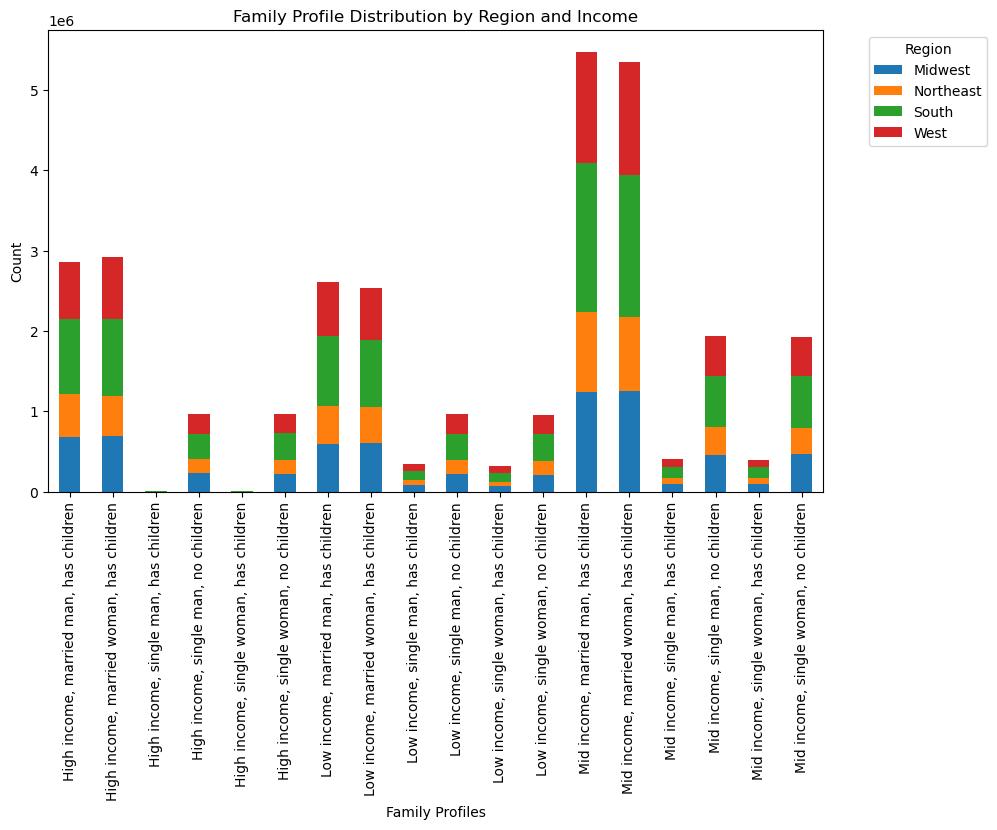

In [32]:
fam_region_income_bar_1 = fam_region_income.plot.bar(stacked=True, figsize=(10, 6))

plt.title('Family Profile Distribution by Region and Income')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

In [36]:
# Export visualization fam_region_income_bar_1
fam_region_income_bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_region_income_bar_1.png'))

#### family_flag_age

In [37]:
# family age profiles by region
fam_region_age = pd.crosstab(df['family_flag_age'],df['region'], dropna = False)

In [39]:
fam_region_age

region,Midwest,Northeast,South,West
family_flag_age,,,,
"Middle-age, married man, has children",686439,537217,977811,750952
"Middle-age, married woman, has children",695628,508610,957113,742444
"Middle-age, single man, has no children",232884,165289,330243,243546
"Middle-age, single woman, has no children",239337,152320,328504,242487
"Middle-old-age, married man, has children",665571,524041,959327,715718
"Middle-old-age, married woman, has children",674603,489378,942548,754604
"Middle-old-age, single man, has no children",230511,165020,316800,268755
"Middle-old-age, single woman, has no children",233420,160453,334059,250633
"Older, married man, has children",668730,553717,967419,741836


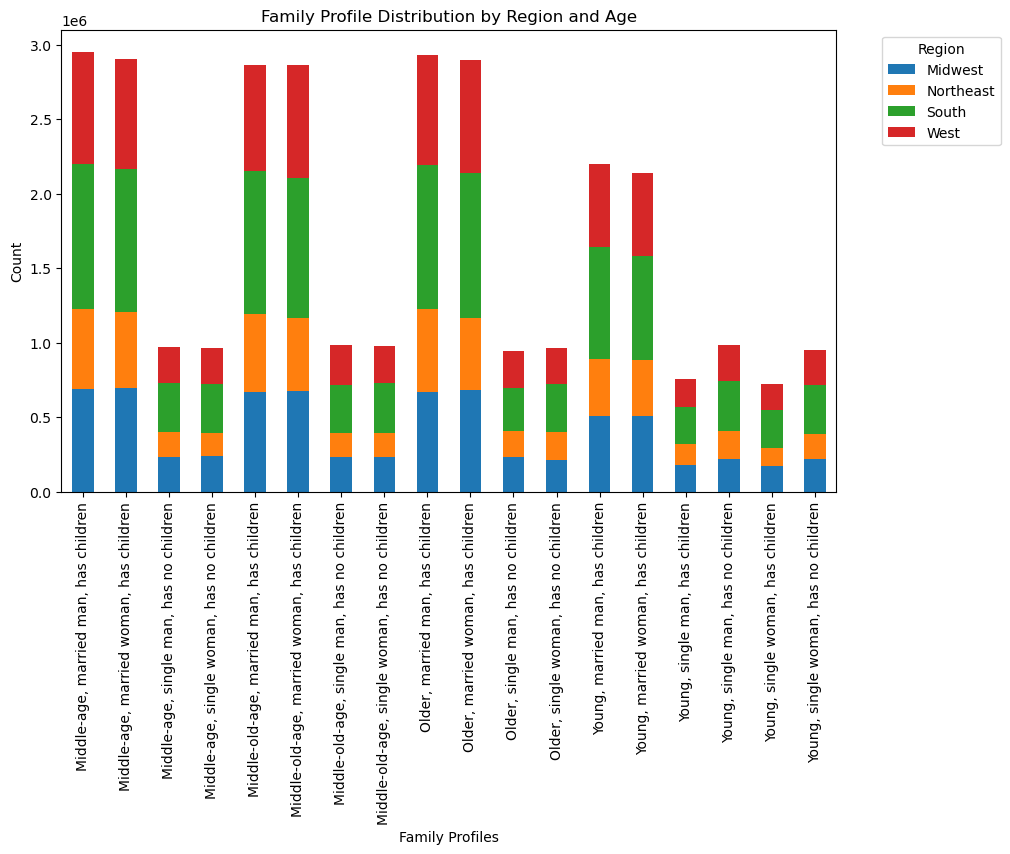

In [40]:
fam_region_age_bar_1 = fam_region_age.plot.bar(stacked=True, figsize=(10, 6))

plt.title('Family Profile Distribution by Region and Age')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

In [41]:
# Export visualization fam_region_age_bar_1
fam_region_age_bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_region_age_bar_1.png'))

## Customer Profiles -  Departments

#### family_flag

In [43]:
# family profiles by departments
fam_departments = pd.crosstab(df['department'],df['family_flag'], dropna = False)

In [44]:
fam_departments

family_flag,"Married man, has children","Married woman, has children","Single man, has children","Single man, no children","Single woman, has children","Single woman, no children"
department,,,,,,
alcohol,46962,52459,4595,18226,3784,18601
babies,146764,140919,10128,52859,9253,50469
bakery,392293,393456,27333,142059,26351,139336
beverages,907782,899671,60815,322920,58292,322421
breakfast,235905,235315,16851,83621,16347,82811
bulk,11934,11884,856,3919,777,4081
canned goods,361208,351369,25510,126855,22967,124165
dairy eggs,1828819,1803780,127224,646478,122983,647898
deli,353049,349284,24343,127199,23776,126183


<Figure size 1000x1200 with 0 Axes>

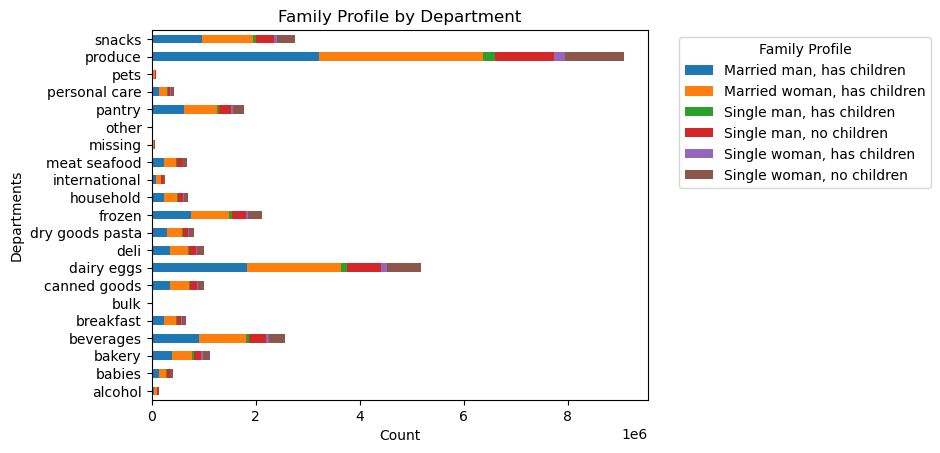

In [61]:
fam_departments_bar = fam_departments.sort_values(by='Married man, has children',ascending = True)

plt.figure(figsize=(10, 12))  
fam_departments.plot.barh(stacked=True)

plt.title('Family Profile by Department')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='Family Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

why doesnt my sort by work?

In [63]:
# Export visualization fam_departments_bar
fam_departments_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_departments_bar.png'))

AttributeError: 'DataFrame' object has no attribute 'figure'

#### family_flag_income

In [56]:
# family income profiles by departments
fam_departments_income = pd.crosstab(df['department'],df['family_flag_income'], dropna = False)

In [57]:
fam_departments_income

family_flag_income,"High income, married man, has children","High income, married woman, has children","High income, single man, has children","High income, single man, no children","High income, single woman, has children","High income, single woman, no children","Low income, married man, has children","Low income, married woman, has children","Low income, single man, has children","Low income, single man, no children","Low income, single woman, has children","Low income, single woman, no children","Mid income, married man, has children","Mid income, married woman, has children","Mid income, single man, has children","Mid income, single man, no children","Mid income, single woman, has children","Mid income, single woman, no children"
department,,,,,,,,,,,,,,,,,,
alcohol,13620,15787,276,4994,197,5988,10891,12870,2179,4397,1559,4929,22451,23802,2140,8835,2028,7684
babies,38841,39797,150,13323,77,13486,28784,27000,3771,10237,4050,9993,79139,74122,6207,29299,5126,26990
bakery,106111,111145,464,36447,341,35915,89163,86583,11520,33208,11582,32771,197019,195728,15349,72404,14428,70650
beverages,226619,234634,665,78612,720,77267,254735,245500,29393,92403,28018,93156,426428,419537,30757,151905,29554,151998
breakfast,59975,61988,215,19897,228,20574,64460,61440,7680,23548,7982,22452,111470,111887,8956,40176,8137,39785
bulk,2754,2973,1,934,1,878,3358,3105,430,995,336,1176,5822,5806,425,1990,440,2027
canned goods,99269,100570,417,33051,317,32237,74356,71289,11210,28415,9805,27402,187583,179510,13883,65389,12845,64526
dairy eggs,486025,496073,1662,163042,1619,165587,414349,397590,55626,154761,53605,153321,928445,910117,69936,328675,67759,328990
deli,92924,94540,254,32305,214,30779,81911,81628,11237,31659,10638,31081,178214,173116,12852,63235,12924,64323


<Figure size 1000x1200 with 0 Axes>

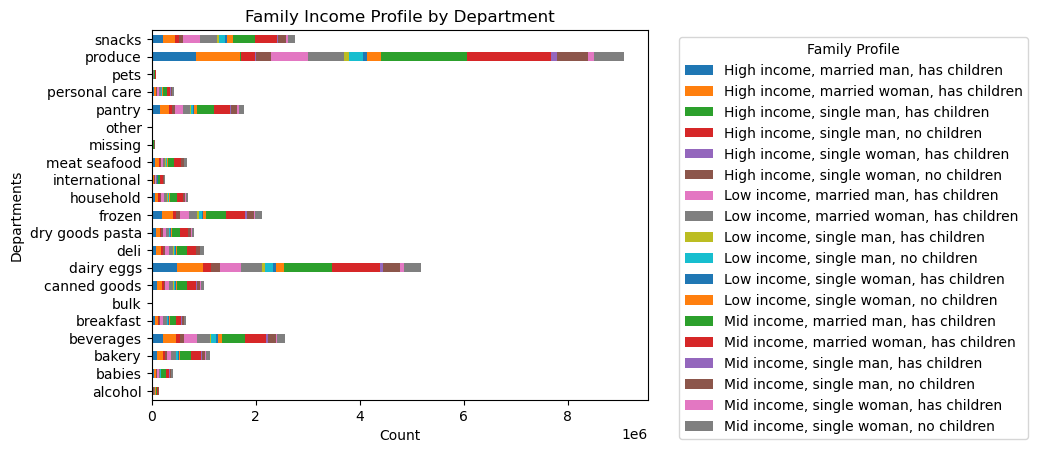

In [59]:
fam_departments_income_bar = fam_departments_income.sort_values(by='Mid income, married man, has children',ascending = True)

plt.figure(figsize=(10, 12))  
fam_departments_income.plot.barh(stacked=True)

plt.title('Family Income Profile by Department')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='Family Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

In [64]:
# Export visualization fam_departments_income_bar
fam_departments_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_departments_income_bar.png'))

AttributeError: 'DataFrame' object has no attribute 'figure'